In [6]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


200


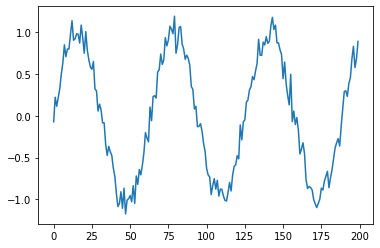

In [25]:
# make synthetic data
series = np.sin(0.1 * np.arange(200))

# optional add noise
series = series + np.random.randn(200)*0.1
print(len(series))

# plot
plt.plot(series)
plt.show();

In [26]:
# build the dataset
T = 10 
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (190, 10, 1)  Y.shape:  (190,)


In [37]:
# autoregressive Linear Model
_input = Input(shape=(T, 1))
x = SimpleRNN(5, activation="relu")(_input)
x = Dense(1)(x)
model = Model(_input, x)

# compile 
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.1),
)

# trian
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2: ], Y[-N//2: ])
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 7ms/sample - loss: 0.3926 - val_loss: 0.1941
Epoch 2/80
95/95 [==============================] - 0s 194us/sample - loss: 0.2120 - val_loss: 0.1641
Epoch 3/80
95/95 [==============================] - 0s 212us/sample - loss: 0.1385 - val_loss: 0.0582
Epoch 4/80
95/95 [==============================] - 0s 209us/sample - loss: 0.0499 - val_loss: 0.0496
Epoch 5/80
95/95 [==============================] - 0s 192us/sample - loss: 0.0592 - val_loss: 0.0612
Epoch 6/80
95/95 [==============================] - 0s 198us/sample - loss: 0.0536 - val_loss: 0.0644
Epoch 7/80
95/95 [==============================] - 0s 196us/sample - loss: 0.0431 - val_loss: 0.0292
Epoch 8/80
95/95 [==============================] - 0s 193us/sample - loss: 0.0377 - val_loss: 0.0451
Epoch 9/80
95/95 [==============================] - 0s 199us/sample - loss: 0.0430 - val_loss: 0.0327
Epoch 10/80
95/95 [=====================

95/95 [==============================] - 0s 201us/sample - loss: 0.0229 - val_loss: 0.0259


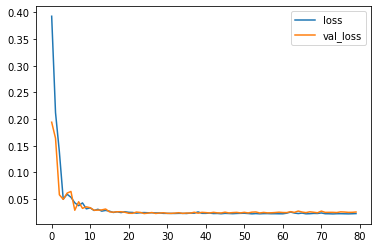

In [39]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

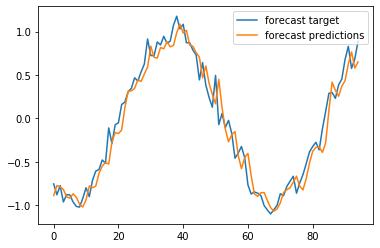

In [40]:
# WRONG forecasting using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar
    i += 1
    validation_predictions.append(p)
    
# plot 
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend();

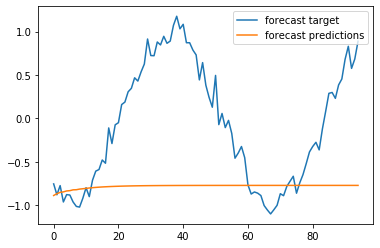

In [41]:
# CORRECT way of forecasting
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1, 1))[0, 0] 
    
    # update
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
    
    
# plot 
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend();